In [1]:
import numpy as np
import pandas as pd
import os
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Загружаем данные
### Датасет взят от сюда: https://www.kaggle.com/tejashvi14/engineering-placements-prediction
### Цель: Определить, зачислят ли студента на Инженерный Курс, основываясь на его прошлом. 

In [2]:
data = pd.read_csv("./collegePlace.csv")

In [3]:
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [5]:
data.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


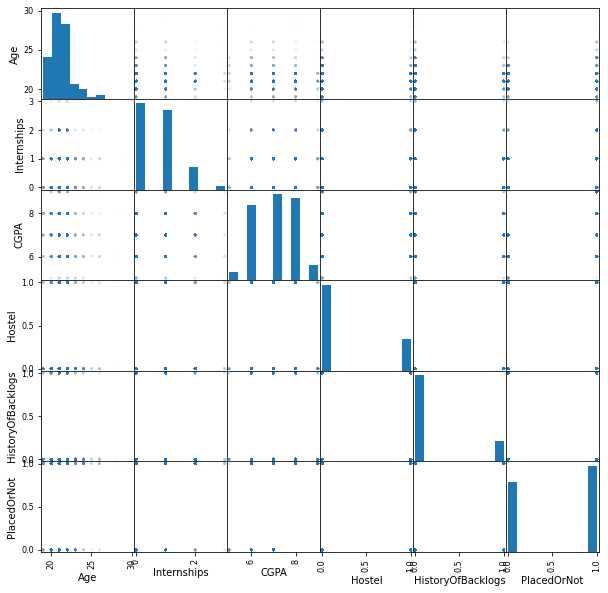

In [6]:
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [7]:
data.corr()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


In [8]:
data.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

### Определяем пропущенные значения

In [9]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Age - 0.0%
Gender - 0.0%
Stream - 0.0%
Internships - 0.0%
CGPA - 0.0%
Hostel - 0.0%
HistoryOfBacklogs - 0.0%
PlacedOrNot - 0.0%


### Пропущенных значений нет

## Признаки
* Age : Возраст
* Gender: Пол
* Stream: Направление
* Internships: Количество стажировок
* CGPA: Среднее значение оценок
* Hostel: Наличие общежития
* HistoryOfBacklogs: История невыполненных работ
* PlacedOrNot: Зачислен или нет

# Готовим данные

In [10]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Gender', 'Stream']
['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']


## Векторизация

In [11]:
data['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [12]:
data_nonbinary = pd.get_dummies(data['Stream'])
print(data_nonbinary.columns)

Index(['Civil', 'Computer Science', 'Electrical',
       'Electronics And Communication', 'Information Technology',
       'Mechanical'],
      dtype='object')


In [13]:
binary_columns = ["Hostel", "HistoryOfBacklogs", "PlacedOrNot", "Gender"]
binary_columns

['Hostel', 'HistoryOfBacklogs', 'PlacedOrNot', 'Gender']

In [14]:
data.at[data['Gender'] == 'Male', 'Gender'] = 0
data.at[data['Gender'] == 'Female', 'Gender'] = 1
data['Gender'].describe()

count     2966
unique       2
top          0
freq      2475
Name: Gender, dtype: int64

## Нормализация количественных признаков

In [15]:
data_numerical = data[["Age", "CGPA", "Internships"]]
data_numerical.describe()

,Age,CGPA,Internships
count,2966.000000,2966.000000,2966.000000
mean,21.485840,7.073837,0.703641
std,1.324933,0.967748,0.740197
min,19.000000,5.000000,0.000000
25%,21.000000,6.000000,0.000000
50%,21.000000,7.000000,1.000000
75%,22.000000,8.000000,1.000000
max,30.000000,9.000000,3.000000


In [16]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Age,CGPA,Internships
count,2.966000e+03,2.966000e+03,2.966000e+03
mean,-2.082398e-15,2.558828e-16,-5.341498e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.876200e+00,-2.142951e+00,-9.506129e-01
25%,-3.666897e-01,-1.109624e+00,-9.506129e-01
50%,-3.666897e-01,-7.629757e-02,4.003779e-01
75%,3.880651e-01,9.570293e-01,4.003779e-01
max,6.426104e+00,1.990356e+00,3.102360e+00


## Соединяем все в одну таблицу

In [17]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
data.describe()

(2966, 13)


,Age,CGPA,Internships,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2.966000e+03,2.966000e+03,2.966000e+03,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,-2.082398e-15,2.558828e-16,-5.341498e-17,0.106878,0.261632,0.112610,0.142953,0.232974,0.142953,0.269049,0.192178,0.552596
std,1.000000e+00,1.000000e+00,1.000000e+00,0.309010,0.439597,0.316168,0.350084,0.422797,0.350084,0.443540,0.394079,0.497310
min,-1.876200e+00,-2.142951e+00,-9.506129e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.666897e-01,-1.109624e+00,-9.506129e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.666897e-01,-7.629757e-02,4.003779e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.880651e-01,9.570293e-01,4.003779e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,6.426104e+00,1.990356e+00,3.102360e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
data

,Age,CGPA,Internships,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender
0,0.388065,0.957029,0.400378,0,0,0,1,0,0,1,1,1,0
1,-0.366690,-0.076298,-0.950613,0,1,0,0,0,0,1,1,1,1
2,0.388065,-1.109624,0.400378,0,0,0,0,1,0,0,0,1,1
3,-0.366690,0.957029,-0.950613,0,0,0,0,1,0,0,1,1,0
4,0.388065,0.957029,-0.950613,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,1.142820,-0.076298,-0.950613,0,0,0,0,1,0,0,0,0,0
2962,1.142820,-0.076298,0.400378,0,0,0,0,0,1,1,0,0,0
2963,0.388065,-0.076298,0.400378,0,0,0,0,1,0,0,0,0,0
2964,0.388065,-0.076298,0.400378,0,1,0,0,0,0,0,0,0,0


## Разбиваем данные вход и выход

In [19]:
X = data.drop('PlacedOrNot', axis = 1)
y = data['PlacedOrNot']
feature_names = X.columns
feature_names

Index(['Age', 'CGPA', 'Internships', 'Civil', 'Computer Science', 'Electrical',
       'Electronics And Communication', 'Information Technology', 'Mechanical',
       'Hostel', 'HistoryOfBacklogs', 'Gender'],
      dtype='object')

In [20]:
X = X.to_numpy()
y = y.to_numpy()

In [21]:
print(X.shape)
print(y.shape)
N, d = X.shape

(2966, 12)
(2966,)


In [22]:
type(X)

numpy.ndarray

In [23]:
type(y)

numpy.ndarray

## Разбиваем данные на train и test

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2076 890


# kNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [26]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [27]:
err_test

0.13595505617977527

In [28]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[375  45]
 [ 76 394]]
